# Árboles de Regresión

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)

In [7]:
regtree.fit(X, Y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

In [8]:
preds = regtree.predict(data[predictors])

In [9]:
data["preds"] = preds

In [10]:
data[["preds", "medv"]]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,23.787500,22.4
502,23.787500,20.6
503,28.978261,23.9
504,31.170000,22.0


In [11]:
from sklearn.tree import export_graphviz

In [12]:
with open("resources/boston_dtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [13]:
import os
from graphviz import Source

In [14]:
file = open("resources/boston_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="rm <= 6.941\\nsquared_error = 84.42\\nsamples = 506\\nvalue = 22.533"] ;\n1 [label="lstat <= 14.4\\nsquared_error = 40.273\\nsamples = 430\\nvalue = 19.934"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="lstat <= 4.91\\nsquared_error = 26.009\\nsamples = 255\\nvalue = 23.35"] ;\n1 -> 2 ;\n3 [label="squared_error = 47.187\\nsamples = 20\\nvalue = 31.565"] ;\n2 -> 3 ;\n4 [label="lstat <= 9.715\\nsquared_error = 17.974\\nsamples = 235\\nvalue = 22.651"] ;\n2 -> 4 ;\n5 [label="age <= 87.6\\nsquared_error = 22.287\\nsamples = 122\\nvalue = 24.393"] ;\n4 -> 5 ;\n6 [label="squared_error = 11.111\\nsamples = 112\\nvalue = 23.787"] ;\n5 -> 6 ;\n7 [label="squared_error = 97.42\\nsamples = 10\\nvalue = 31.17"] ;\n5 -> 7 ;\n8 [label="ptratio <= 17.85\\nsquared_error = 6.503\\nsamples = 113\\nvalue = 20.77"] ;\n4 -> 8 ;\n9 [label="squared_error = 8.556\\nsamples = 33\\nv

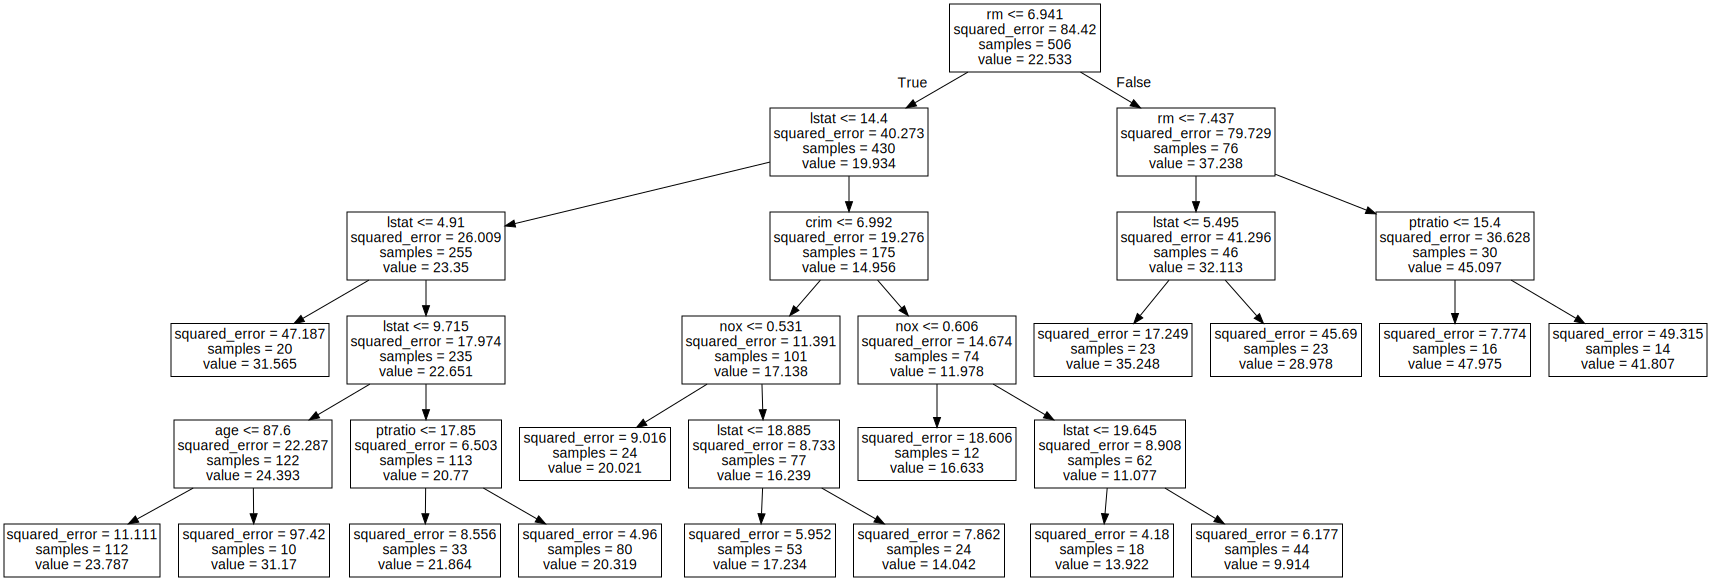

In [15]:
Source(text)

In [16]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

In [17]:
cv = KFold(n_splits = 10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring=make_scorer(mean_squared_error), cv=cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[14.21501779 16.62018743 18.48312343 46.22608214 10.25202434 18.39546877
 15.08005674 32.23929702 23.04375075 10.93761052]
20.54926189262014


In [18]:
list(zip(predictors, regtree.feature_importances_))

[('crim', 0.032184533425691254),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.016195328299152056),
 ('rm', 0.6341876193016562),
 ('age', 0.014165271650613091),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.009620458196377114),
 ('black', 0.0),
 ('lstat', 0.2936467891265104)]

## Random Forests

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=500)
forest.fit(X, Y)

RandomForestRegressor(n_estimators=500, n_jobs=2, oob_score=True)

In [21]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred", "medv"]]

,rforest_pred,medv
0,28.590055,24.0
1,22.577041,21.6
2,34.295588,34.7
3,34.804687,33.4
4,34.449123,36.2
...,...,...
501,24.619780,22.4
502,19.069945,20.6
503,27.668844,23.9
504,26.531122,22.0


In [22]:
data["rforest_error2"] = (data["rforest_pred"] - data["medv"])**2
sum(data["rforest_error2"])/len(data)

10.407902291731466

Ha bajado bastante el error respecto al árbol de regresión

In [23]:
forest.oob_score_

0.8767121889094258